## Hierarchical Clustering PreClass

In hierarchical clustering, we do not specify the number of clusters at the beginning. We allow the algorithm to aggregate all the data.

Hierarchical clustering algorithms operate clusters by hierarchically combining data, taking into account the similarities of the data. Therefore, these algorithms produce different cluster levels, and we choose the best according to our needs.
Hierarchical clustering is a technique that aims to create a tree-like cluster hierarchy within the data. This tree-like hierarchical representation of clusters is called a dendrogram.
We use Linkage Matrix, which is a mathematical matrix, to build out a dendrogram. 

Another key topic is the similarity metric. Like in K means clustering, the similarity metric measures the distance between two points, and there are lots of different ways to do this. There's Euclidean distance, Manhattan distance, Cosine distance, and many more options. By default, we'll use Euclidean distance, and it's quite a decent one.

There are two types of hierarchical clustering approaches:


1. **Agglomerative (Bottom-up approach):** In this approach, at first, each data is considered as a cluster, and according to their similarity, these data/clusters are continued to cluster until the cluster is the highest point and become a single cluster. Steps are:

    - Combines the two most similar clusters, thereby reducing the total number of clusters by one.
    - Then, repeat the previous step until only one cluster remains. The figure above shows this approach.
    
    
2. **Divisive (Top-down approach):** This approach, also called split clustering, starts with a single cluster. Then,

    - Uses a parametric clustering algorithm such as k-mean to divide the cluster into two clusters.
	- Repeats the above step for each subset until all observations are clustered as independent sets.





In [47]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
tests = pd.read_csv("testperform_long.csv")
tests.head()

,id,name,value,test
0,1,zero,64.270000,0
1,1,one,65.950884,1
2,1,two,69.865513,2
3,1,three,70.071844,3
4,1,four,71.557456,4


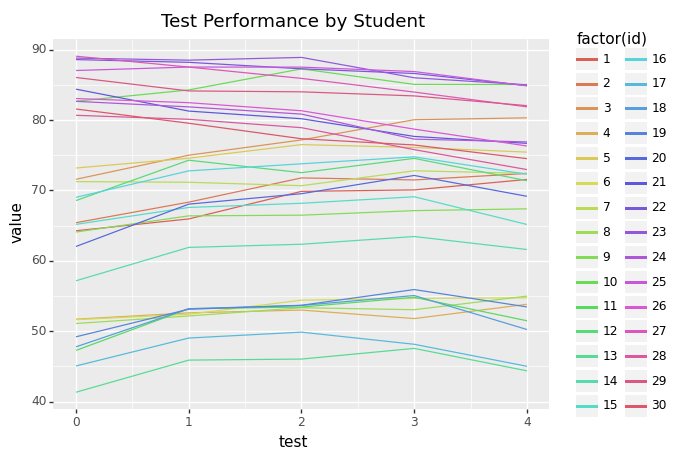

<ggplot: (201889331706)>

In [17]:
(ggplot(tests, aes("test", "value", color = "factor(id)")) + geom_line() + ggtitle("Test Performance by Student"))

In [30]:
df = tests.pivot(columns="test", values="value", index="id").reset_index(drop=True)
df.head()

test,0,1,2,3,4
0,64.27,65.950884,69.865513,70.071844,71.557456
1,65.42,68.334638,71.774954,71.488519,72.414197
2,71.58,75.002741,77.169056,80.038548,80.307990
3,51.71,52.610899,53.005482,51.800135,53.829034
4,73.18,74.575287,76.507547,76.102415,75.441424


In [31]:
df.columns = ["zero", "one", "two", "three", "four"]

In [34]:
# Now our dataframe is good for clustering.
# Each row is a participant and each column is one of their tests.

In [37]:
# First thing we want to do is to decide which features are we gonna use to cluster.
features = list(df.columns)
features

['zero', 'one', 'two', 'three', 'four']

In [40]:
X = df[features]
X.head()
# These tests are on the same 0 to 100 sclae. Dont't need to scale.

,zero,one,two,three,four
0,64.27,65.950884,69.865513,70.071844,71.557456
1,65.42,68.334638,71.774954,71.488519,72.414197
2,71.58,75.002741,77.169056,80.038548,80.307990
3,51.71,52.610899,53.005482,51.800135,53.829034
4,73.18,74.575287,76.507547,76.102415,75.441424


In [41]:
hac = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
hac.fit(X)

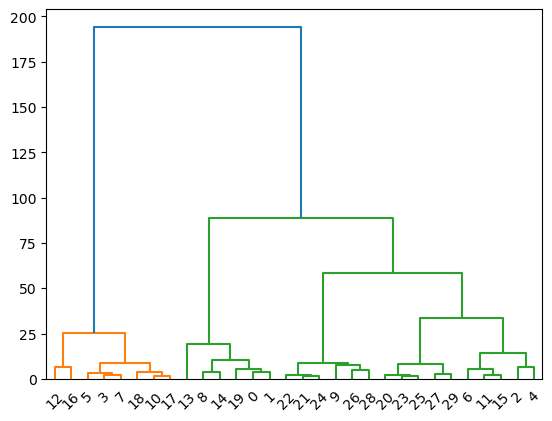

In [48]:
dendro = sch.dendrogram(sch.linkage(X, method="ward", metric="euclidean"))

In [50]:
membership = hac.labels_
membership

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
silhouette_score(X, membership)

0.6429365563401731

In [53]:
df["cluster2"] = membership

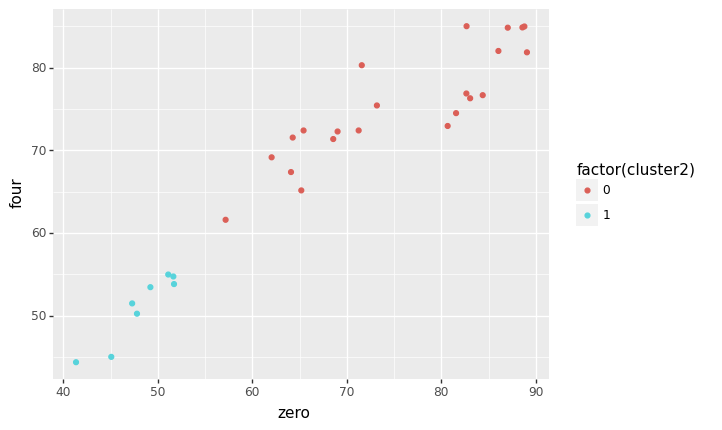

<ggplot: (201891609727)>

In [54]:
(ggplot(df, aes(x = "zero", y = "four", color = "factor(cluster2)"))+ geom_point())

In [56]:
hac = AgglomerativeClustering(n_clusters = 3, affinity="euclidean", linkage="ward")
hac.fit_predict(X)

array([2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [58]:
membership2 = hac.labels_
membership2

array([2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
silhouette_score(X, membership2)

0.5275892679012393